**Nama : Indriani Lutfiyyatunnisa**

**NIM : 1306620035**

**Mata Kuliah : Pengolahan Citra Digital**

**Import Library**

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

**Menampilkan Gambar**

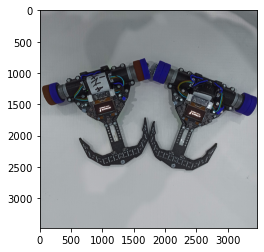

In [6]:
img = cv.imread("linefollower.jpg", 1)
plt.imshow(img)

**Convert Gambar BGR ke RGB**

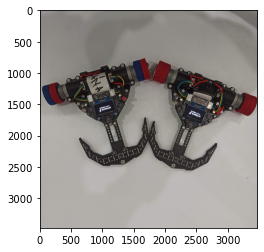

In [7]:
img_LF = cv.cvtColor(img, cv.COLOR_BGR2RGB)
Image.fromarray(img_LF).save('linefollower_RGB.jpg')
plt.imshow(img_LF)

**Menampilkan Histogram RGB Gambar**

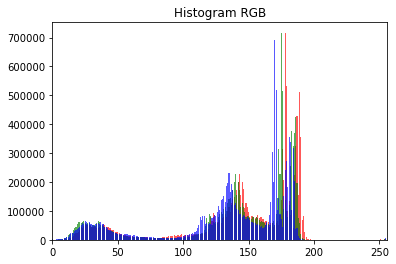

In [8]:
colors=('red','green','blue')
plt.figure()
plt.xlim([0,256])
for channel_id, color in enumerate(colors):
    histogram,bin_edges= np.histogram(img_LF[:,:,channel_id],bins=256,range=(0,256))
    plt.bar(bin_edges[0:-1],histogram,color=color, alpha =0.65)
    plt.title("Histogram RGB")

**Affine Transformasi pada Gambar**

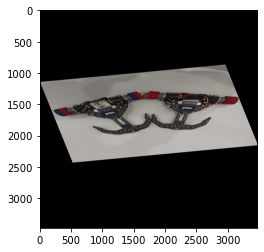

In [9]:

srcTri = np.array( [[0, 0], [img_LF.shape[1] - 1, 0], [0, img_LF.shape[0] - 1]] ).astype(np.float32)
dstTri = np.array( [[0, img_LF.shape[1]*0.33], [img_LF.shape[1]*0.85, img_LF.shape[0]*0.25], [img_LF.shape[1]*0.15, img_LF.shape[0]*0.7]] ).astype(np.float32)
warp_mat = cv.getAffineTransform(srcTri, dstTri)

warp_dst = cv.warpAffine(img_LF, warp_mat, (img_LF.shape[1], img_LF.shape[0]))

plt.imshow(warp_dst)

**Rotasi pada Gambar**

Text(0.5, 1.0, 'gambar yang terotasi')

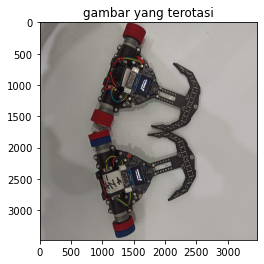

In [10]:
#Rotasi pada Gmabar

height, width = img_LF.shape[:2]
center = (width/2,height/2)

rotate_matrix = cv.getRotationMatrix2D(center=center, angle=90, scale=1)

rotated_image = cv.warpAffine(src=img_LF, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)
plt.title('gambar yang terotasi')

**Perspektif pad Gambar**

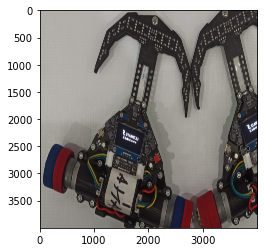

In [11]:

pts1 = np.float32([[0, 2500], [1250, 2500],
                    [0, 2000], [1250, 2000]])
pts2 = np.float32([[0, 0], [2000, 0],
                    [0, 1250], [2000, 1250]])

matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img_LF, matrix, (4000, 4000))
plt.imshow(result)

**Pencerminan pada Gambar**

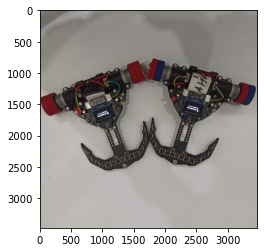

In [12]:
flipHorizontal = cv.flip(img_LF, 1)
plt.imshow(flipHorizontal)

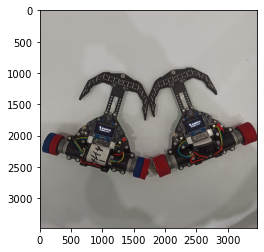

In [13]:
flipVertikal = cv.flip(img_LF, 0)
plt.imshow(flipVertikal)